## G2M insight for Cab Investment firm ( Must for all Specialization)

**Business Problem:**

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

**Dataset Information:**

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

**Properties of the dataset provided**

The Final dataset accounts to 3,59,392 rows and 22 columns containing information of 2 cab services from 19 cities.

**EDA Procedure**

The four individual datasets are merged using their unique keys in each column. Then the data preprocessing has been done in order to check for duplication of rows and null values etc.,

Descriptive statistics has been carried out on the dataset to develop useful insights.

Time series analysis has been carried out to develop actionable insights from the dataset.

Various hypothesis generated and tested against this dataset to check the credibility.

Finally, the brief report is presented at the end of this Notebook.

**Import the libraries required to process the datasets and develop the function to read in the csv files**

In [237]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [238]:
#reading the csv files

def read_csv(file):
    '''This fucntion takes in the file name and return as dataframe
    Args: Filename
    Returns: DataFrame''' 
    return pd.read_csv(file)

In [239]:
transaction_df = read_csv("1Transaction_ID.csv")    #file contain trasaction details
customer_df = read_csv("2Customer_ID.csv")          #file contain customer details
city_df = read_csv("3City.csv")                     #file conatin city details
cabdata_df = read_csv("4Cab_Data.csv")              #file contain cab company details

In [240]:
#merging cab data and transaction details
merged1 = pd.merge(cabdata_df, transaction_df, how = "left", on = ["Transaction ID"])

#merging the above df and customer details
merged_df = pd.merge(merged1, customer_df, how = "left", on = ["Customer ID"])

#merging the above df and city details to create master df
master_df = pd.merge(merged_df, city_df, how = "left", on = ["City"])

**After creating the master dataframe, we will create new columns such as profit, profit percentage and user density to create insights and change type of some of the columns for our calculation purpose.**

In [241]:
#convert population datatype into float
master_df['Population'] = master_df['Population'].str.replace(',', '').astype(float)

#convert users datatype into float
master_df['Users'] = master_df['Users'].str.replace(',', '').astype(float)

#create profit column by deducing the price charged from the cost of trip
master_df['Profit'] = master_df['Price Charged'] - master_df['Cost of Trip']

#create profit percentage column from the profit into cost of trip column
master_df['Profit Percentage per Trip'] = ((master_df['Profit'] / master_df['Cost of Trip'])*100).round(2)

#create the user density column by dividing the users column into population
master_df['Users Density'] = master_df['Users'] / master_df['Population']

#create column to find the value of charges per km
master_df['Price Charged per KM'] = master_df['Price Charged'] / master_df['KM Travelled']



**Datetime**

In this case, the dates are given in the form five digit code, which has to be converted into a proper date format. All the five digit code will give dates as from 1970 only. Therefore as per documentation, start date has to be noted and deducted the from the minimum date code in the dataset. The resulting value should be noted and fed in the datetime conversion column to get the correct date.

In [242]:
#Import the required libraries for converting the date column
from datetime import datetime, timedelta
from datetime import datetime
import datetime as dt

#create a new column and store the values in the column.
master_df['Date Travel'] = datetime(1899, 12, 30) + master_df['Date of Travel'].map(dt.timedelta)

In [243]:
#sort the column with the date wise
master_df.sort_values(by='Date Travel', inplace=True)

#fix the column index as date
master_df.set_index('Date Travel', inplace=True)

In [244]:
#Import the required librires 
from datetime import datetime, timedelta
from datetime import datetime
import datetime as dt

#replace the date of travel column with correct date
master_df['Date of Travel'] = datetime(1899, 12, 30) + master_df['Date of Travel'].map(dt.timedelta)

In [245]:
#create a new column moth, year and join them to period month
master_df['Month'] = master_df['Date of Travel'].dt.month
master_df['Year'] = master_df['Date of Travel'].dt.year
master_df['month_year'] = pd.to_datetime(master_df['Date of Travel']).dt.to_period('M')

In [246]:
#Check the master dataframe 
master_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Income (USD/Month),Population,Users,Profit,Profit Percentage per Trip,Users Density,Price Charged per KM,Month,Year,month_year
Date Travel,,,,,,,,,,,,,,,,,,,,,
2016-01-02,10001340,2016-01-02,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,...,10606,418859.0,127001.0,66.6760,49.08,0.303207,19.856863,1,2016,2016-01
2016-01-02,10000640,2016-01-02,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,4844,Cash,Male,...,5548,1955130.0,164468.0,164.9960,78.70,0.084121,24.016667,1,2016,2016-01
2016-01-02,10000635,2016-01-02,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,5671,Cash,Male,...,7081,1955130.0,164468.0,195.7548,58.07,0.084121,21.245215,1,2016,2016-01
2016-01-02,10001001,2016-01-02,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,2761,Card,Male,...,11462,8405837.0,302149.0,796.6140,133.82,0.035945,29.741667,1,2016,2016-01
2016-01-02,10000171,2016-01-02,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,20687,Cash,Male,...,8926,959307.0,69995.0,122.0660,82.99,0.072964,18.848039,1,2016,2016-01


In [247]:
#Drop the unwanted columns from the daatframe
master_df.drop(['Transaction ID', 'Customer ID'], axis=1, inplace=True)

In [248]:
#Describe the dataframe
master_df.describe()

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users,Profit,Profit Percentage per Trip,Users Density,Price Charged per KM,Month,Year
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,35.336705,15048.822937,3.132198e+06,158365.582267,137.253198,47.523121,0.106687,18.765127,7.500434,2017.045199
std,12.233526,274.378911,157.993661,12.594234,7969.409482,3.315194e+06,100850.051020,160.311840,42.571507,0.106331,5.878560,3.445095,0.800239
min,1.900000,15.600000,19.000000,18.000000,2000.000000,2.489680e+05,3643.000000,-220.060000,-40.930000,0.006497,6.338621,1.000000,2016.000000
25%,12.000000,206.437500,151.200000,25.000000,8424.000000,6.712380e+05,80021.000000,28.012000,16.080000,0.035945,14.451327,5.000000,2016.000000
50%,22.440000,386.360000,282.480000,33.000000,14685.000000,1.595037e+06,144132.000000,81.962000,35.930000,0.072964,17.153501,8.000000,2017.000000
75%,32.960000,583.660000,413.683200,42.000000,21035.000000,8.405837e+06,302149.000000,190.030000,71.270000,0.090363,22.234926,10.000000,2018.000000
max,48.000000,2048.030000,691.200000,65.000000,35000.000000,8.405837e+06,302149.000000,1463.966000,320.210000,0.321411,53.955556,12.000000,2018.000000


In [249]:
#Get the info of the dataframe to check for dtypes and null values
master_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 359392 entries, 2016-01-02 to 2018-12-31
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date of Travel              359392 non-null  datetime64[ns]
 1   Company                     359392 non-null  object        
 2   City                        359392 non-null  object        
 3   KM Travelled                359392 non-null  float64       
 4   Price Charged               359392 non-null  float64       
 5   Cost of Trip                359392 non-null  float64       
 6   Payment_Mode                359392 non-null  object        
 7   Gender                      359392 non-null  object        
 8   Age                         359392 non-null  int64         
 9   Income (USD/Month)          359392 non-null  int64         
 10  Population                  359392 non-null  float64       
 11  Users                  

In [250]:
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicated_rows = master_df[master_df.duplicated()]
if len(duplicated_rows) >= 1:  
    print("Duplicate Rows :")
    # Print the resultant Dataframe
    duplicated_rows
else:
    print("There are no Duplicated rows")

There are no Duplicated rows


**Descriptive Statistics**

The EDA has been done in order to develop insights from the dataset. SNS libraries plot has been used to visulaise useful plots.

**Corr Plot**

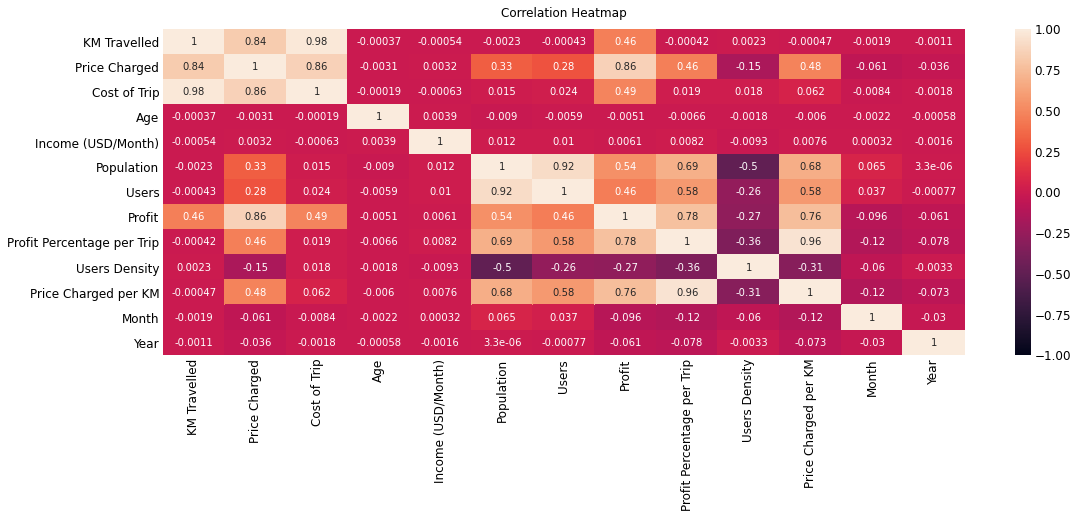

In [251]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to 
                                            #True to display the correlation values on the heatmap.
heatmap = sns.heatmap(master_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From the corr plot Km travelled and the cost of trip in highly correlated and there are some fields such between price charged and km travelled, price charged and cost of trip. As in terms with profit, Km travelled, price charged, cost of trip, population, users are higly correlated.

**Bar Plot to check profit by city for each comapnies**

In [317]:
def barplot(x,y,hue,title):
    '''this function delivers a bar plot with column in x and y axis, hue on the bar by selected column.
    Args: x=column on x-axis, y=column on y-axis, hue=detail of particular column in bar, title=required title
    returns: bar plot'''
    #set the plot
    plt.figure(figsize=(30,8))
    #sns library bar plot
    bar_plot = sns.barplot(x=x, y=y, hue=hue, data=master_df, dodge=0, ci=None, palette = 'Set2')
    #set the title
    bar_plot.set_title(title)
    #return the plot
    return plt.show()

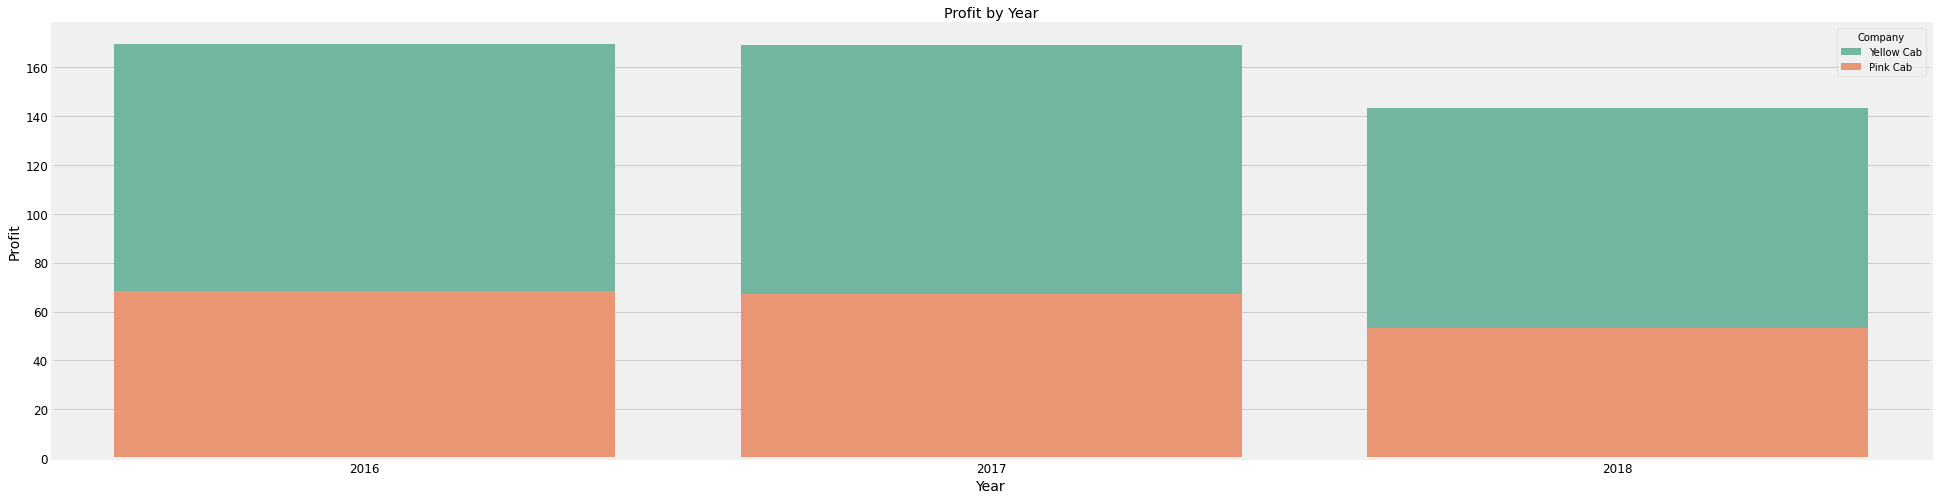

In [318]:
#plot for the profit by year across companies

barplot("Year","Profit","Company","Profit by Year")

From the above plot, we can see profit in the 2017 is higher than 2016 but gone down in 2018

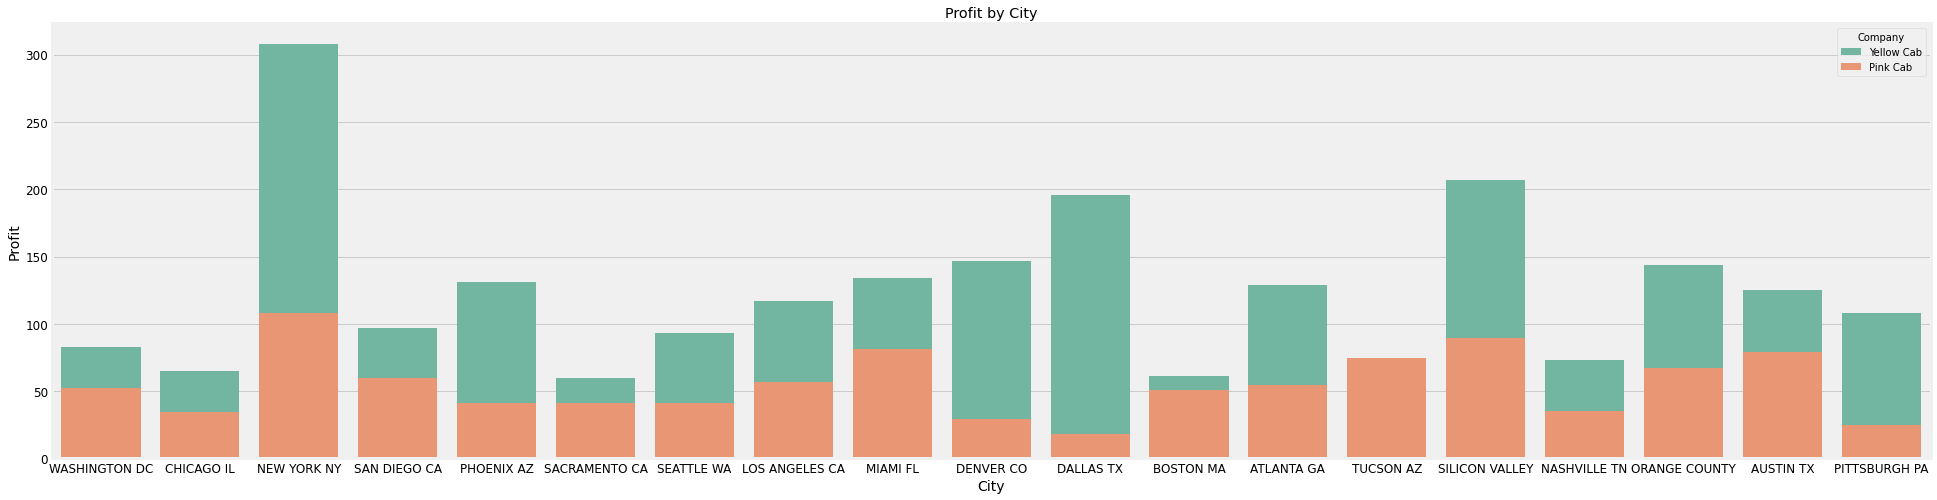

In [319]:
#plot for the profit by city across companies

barplot("City","Profit","Company","Profit by City")

From the above bar plot we can infer that though there is a competition between these cab companies, cities like New york, Phoneix, Denver, Dallas, Silicon valley, Pittsburgh yeilding high amount of profit to yellow cab. 

**Lets do a bar plot to find high profiting cities from ascending order**

<AxesSubplot:ylabel='City'>

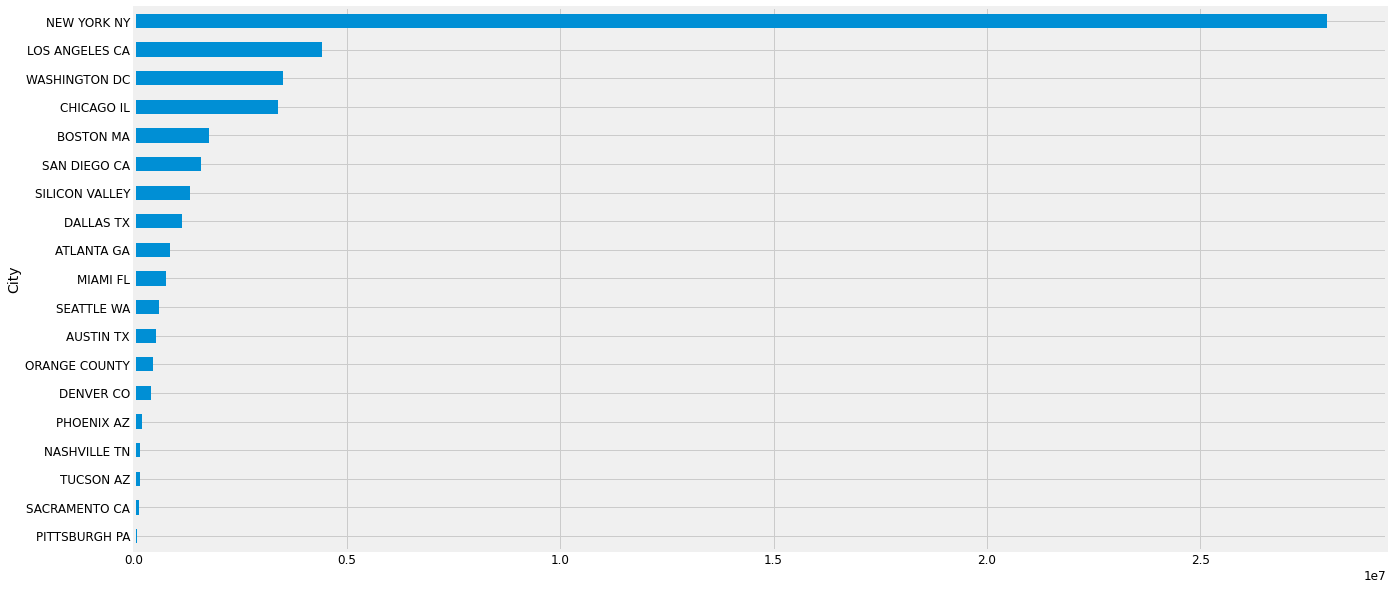

In [320]:
#set the plot size
plt.figure(figsize=(20, 10))

#df group by city and sum the profit given in ascending order in a bar plot.
master_df.groupby('City').Profit.sum().sort_values(ascending=True).plot(kind='barh')

From the above plot, on a whole, it is evident that the high profit yielding top 5 cities are

**New York,
Los Angelles,
Washington DC,
Chicago,
Boston**

**Lets do a bar plot to find high profit by year from ascending order**

<AxesSubplot:ylabel='Year'>

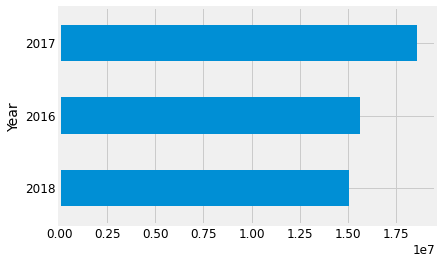

In [303]:
#set the plot size
plt.figure(figsize=(20, 10))

master_df.groupby(master_df["Year"]).Profit.sum().sort_values(ascending=True).plot(kind='barh')

**2017** is the highest profit year for the cab companies as a whole

**Distribution plot**

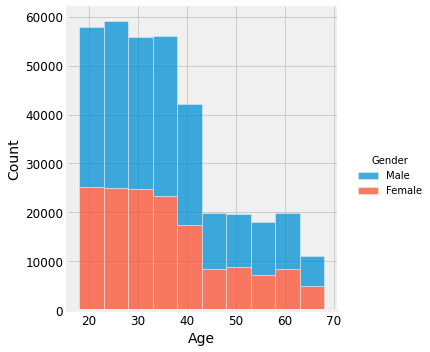

In [106]:
sns.displot(master_df, x="Age", binwidth=5, bins=[10, 20, 30, 40, 50, 60, 70, 80], hue='Gender',  multiple="stack")

From the distribution plot, it is clear that ages from 20-40 are using the taxis at higher number of times.

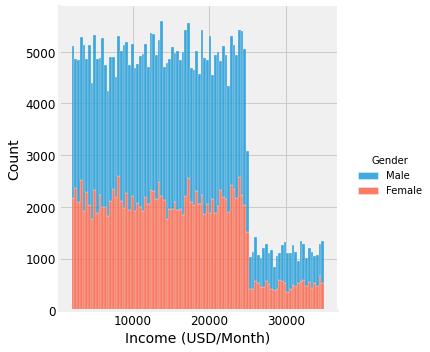

In [330]:
sns.displot(master_df, x="Income (USD/Month)", hue="Gender", multiple="stack")

From this distribution plot, people with Income upto 25000 USD per month are using the cab service mostly.

**CountPlot**

Lets do a count plot to bring some more insights

In [331]:
#define a function for count plot
def make_countplot(x_axis,hue,data,title):
    '''Takes in the column need to be shown on x-axis, column to be distinguised as hue, data source and 
    and title for the plot
    Args: Column on x-axis, column to be hued, source data, plot title
    Return: SNS Count Plot'''
    #set the figure size
    plt.figure(figsize=(10,5))
    #bring the parameters for x axism y-axis and hue
    sns.countplot(x = x_axis, hue = hue, data = data, palette = 'magma')
    #set title
    plt.title(title)
    #return the plot
    return plt.show()

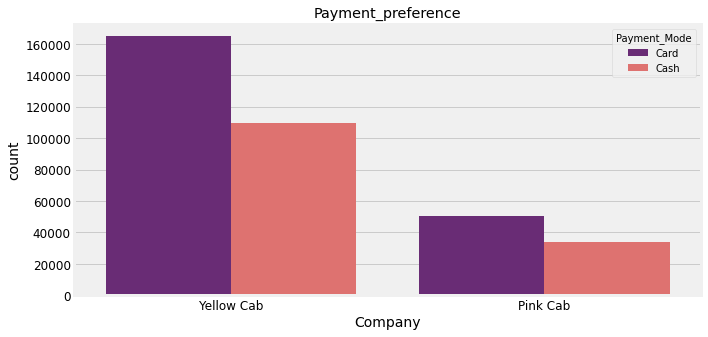

In [332]:
#Count plot to see cash and card transaction by company

make_countplot('Company', 'Payment_Mode', master_df, 'Payment_preference')

In Both the companies, Card transaction has been done in higher number than the cash transactions.

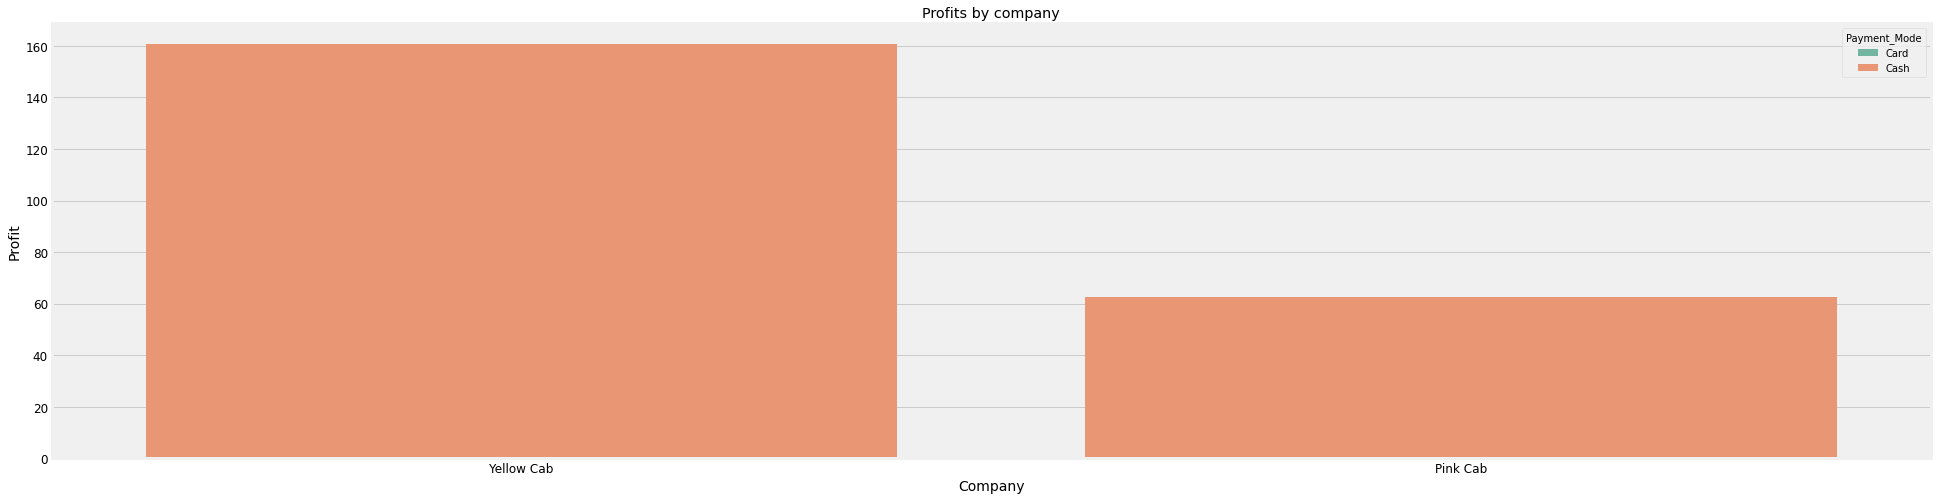

In [333]:
#barplot to see which transaction yeilded most profit

barplot("Company","Profit","Payment_Mode","Profits by company")

In [338]:
#Check for the actual values of profit by gender

master_df["Profit"].groupby(master_df["Company"]).sum()

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64

Though the card transactions happened most of the time, the profit yeilded most on the cash transactions.

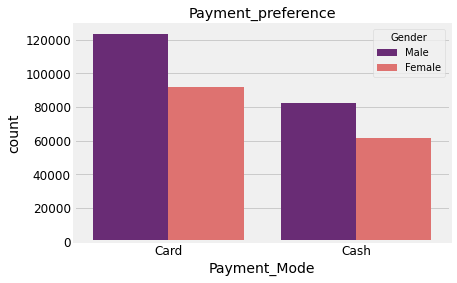

In [109]:
#Count plot to see the payment preference by gender

make_countplot('Payment_Mode', 'Gender', master_df, 'Payment_preference')

From the plot it's hard to say the preference but card transaction holds high in number

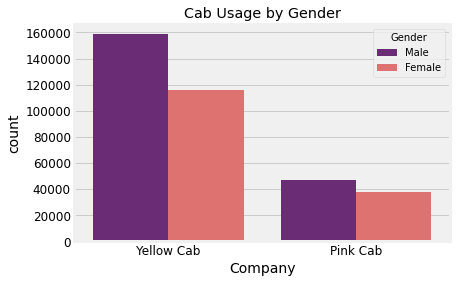

In [110]:
#count plot to check cab usage by gender

make_countplot('Company', 'Gender', master_df, 'Cab Usage by Gender')

From the plot, both male and female genders used the yellow cab more times.

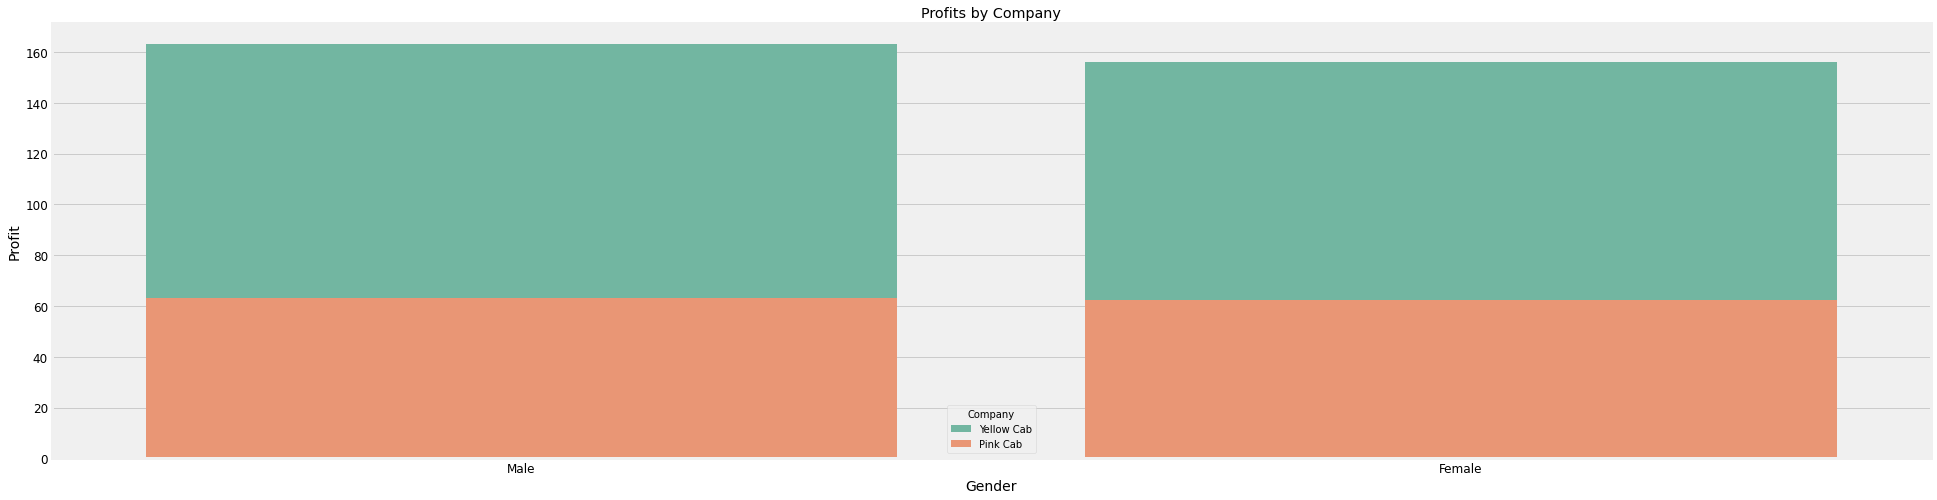

In [334]:
barplot("Gender","Profit","Company","Profits by Company")

If we see the profits in the last three years, the profits amounts to nearly the same for both companies by gender

In [337]:
#Check for the actual values of profit by gender

master_df["Profit"].groupby(master_df["Gender"]).sum()

Gender
Female    2.046195e+07
Male      2.886575e+07
Name: Profit, dtype: float64

In [396]:
#Check the profit for each company on a year level

df = master_df.pivot_table(index='Company', columns='Year', values='Profit', aggfunc='sum', margins=True)
print(df)

Year                2016          2017          2018           All
Company                                                           
Pink Cab    1.713511e+06  2.033655e+06  1.560162e+06  5.307328e+06
Yellow Cab  1.392700e+07  1.657598e+07  1.351740e+07  4.402037e+07
All         1.564051e+07  1.860963e+07  1.507756e+07  4.932770e+07


#### Scatter PLot to check the relationship between various atrributes

The following plot tells us about the relationship between the KM travelled and profit, also cost of trip


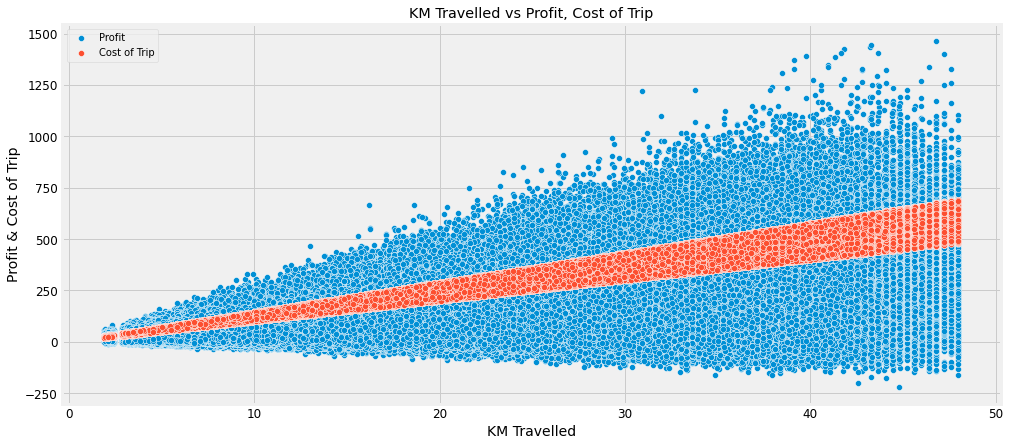

In [111]:
#set the plot figure size
fig, ax = plt.subplots(figsize=(15,7))
#scatterplot between KM travelled and profit
sns.scatterplot(data=master_df, x="KM Travelled", y="Profit")
#scatterplot between KM travelled and cost of trip
sns.scatterplot(data=master_df, x="KM Travelled", y="Cost of Trip")
#set the x-axis label
plt.xlabel("KM Travelled")
#set the y-axis label
plt.ylabel("Profit & Cost of Trip")
#set the plot title
plt.title("KM Travelled vs Profit, Cost of Trip")
#set the legend for the plot
ax.legend(['Profit', 'Cost of Trip'])
#show the plot
plt.show()

The plot shows as KM travelled increases, the cost of trip also increases which is normal as profit yeilding company, but the profit show positive correlation but also sometimes company also incur no profit.

The following scatter plot analyses the relationship between KM travelled and cost of trip by company

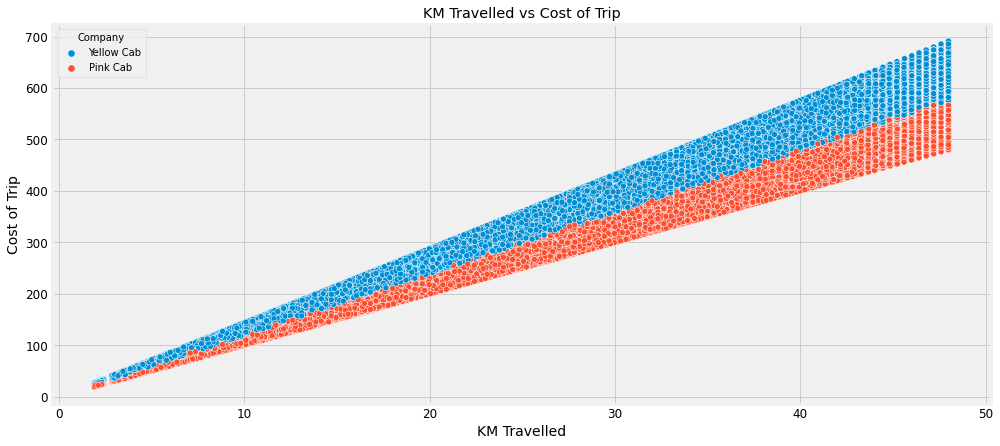

In [341]:
#Set the figure size
fig, ax = plt.subplots(figsize=(15,7))
#Scatter plot bewteen KM travelled and cost of trip by company
sns.scatterplot(data=master_df, x="KM Travelled", y="Cost of Trip", hue='Company')
#set the x-axis label
plt.xlabel("KM Travelled")
#set the y-axis label
plt.ylabel("Cost of Trip")
#set the plot title
plt.title("KM Travelled vs Cost of Trip")
#show the plot
plt.show()

The above plot tells us that both comapnies are same as KM travelled increases, cost of trip increases. Though the intial KM values are same for both companies, as KM travelled increases, the pink cab cost of trip stays low when compared with yellow cab.

### Average profit Per KM and Profit percentage per trip

Let's find out how much both companies are making as an average profit per kilometer and also the average profit percentage per trip.

In [268]:
#define a function
def avg_values(column1,column2,title):
    '''Takes in the column which need to be averaged and the column which need to be grouped and title.
    Args: column1, column2, title
    return: average values of column1 grouped by column2 with the title'''
    #column to be averaged by group of values from another column and take mean finally
    avg_price = master_df[column1].groupby(master_df[column2]).mean()
    #plot the above result and set the title
    avg_price.plot(kind='bar', figsize=(10,5), title=title)
    #return the result and plot
    return avg_price, plt.show()

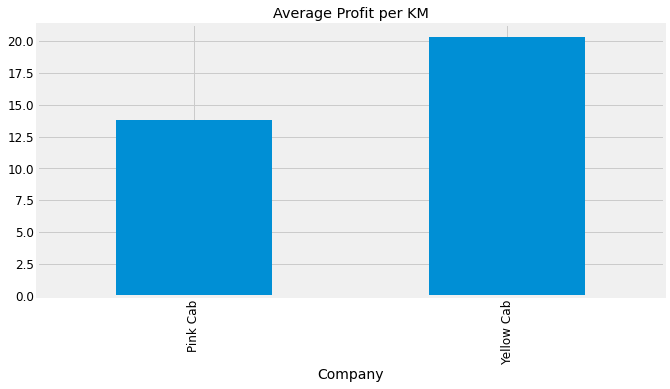

(Company
 Pink Cab      13.768510
 Yellow Cab    20.306073
 Name: Price Charged per KM, dtype: float64,
 None)

In [269]:
#find the average profit per km travelled for both comapnies

avg_values("Price Charged per KM","Company","Average Profit per KM")

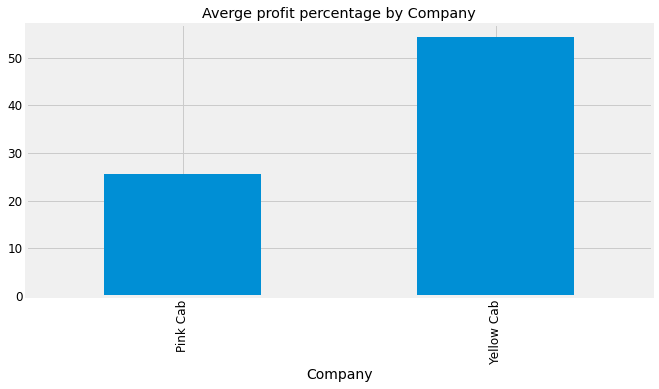

(Company
 Pink Cab      25.559567
 Yellow Cab    54.296631
 Name: Profit Percentage per Trip, dtype: float64,
 None)

In [270]:
#find the Average profit percentage trip for both the companies.

avg_values('Profit Percentage per Trip','Company','Averge profit percentage by Company')

Lets look at the Cumulative sum of the cost of trip and total price charged 

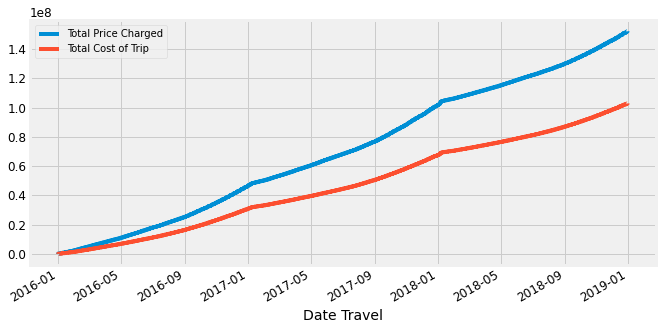

In [257]:
#Cumulative sum the price charged 
master_df['Total Price Charged'] = master_df['Price Charged'].cumsum()
#Cumulative sum the cost of the trip
master_df['Total Cost of Trip'] = master_df['Cost of Trip'].cumsum()
#set the figure size
plt.figure(figsize=(10, 5))
#plot the Total price charged and total cost of trip
master_df['Total Price Charged'].plot();
master_df['Total Cost of Trip'].plot();
#plot the legend
plt.legend();

We can see both cab companies total price charged are same at the start of 2016 but the gap between them increasing as the years increasing.

### Time Series analysis

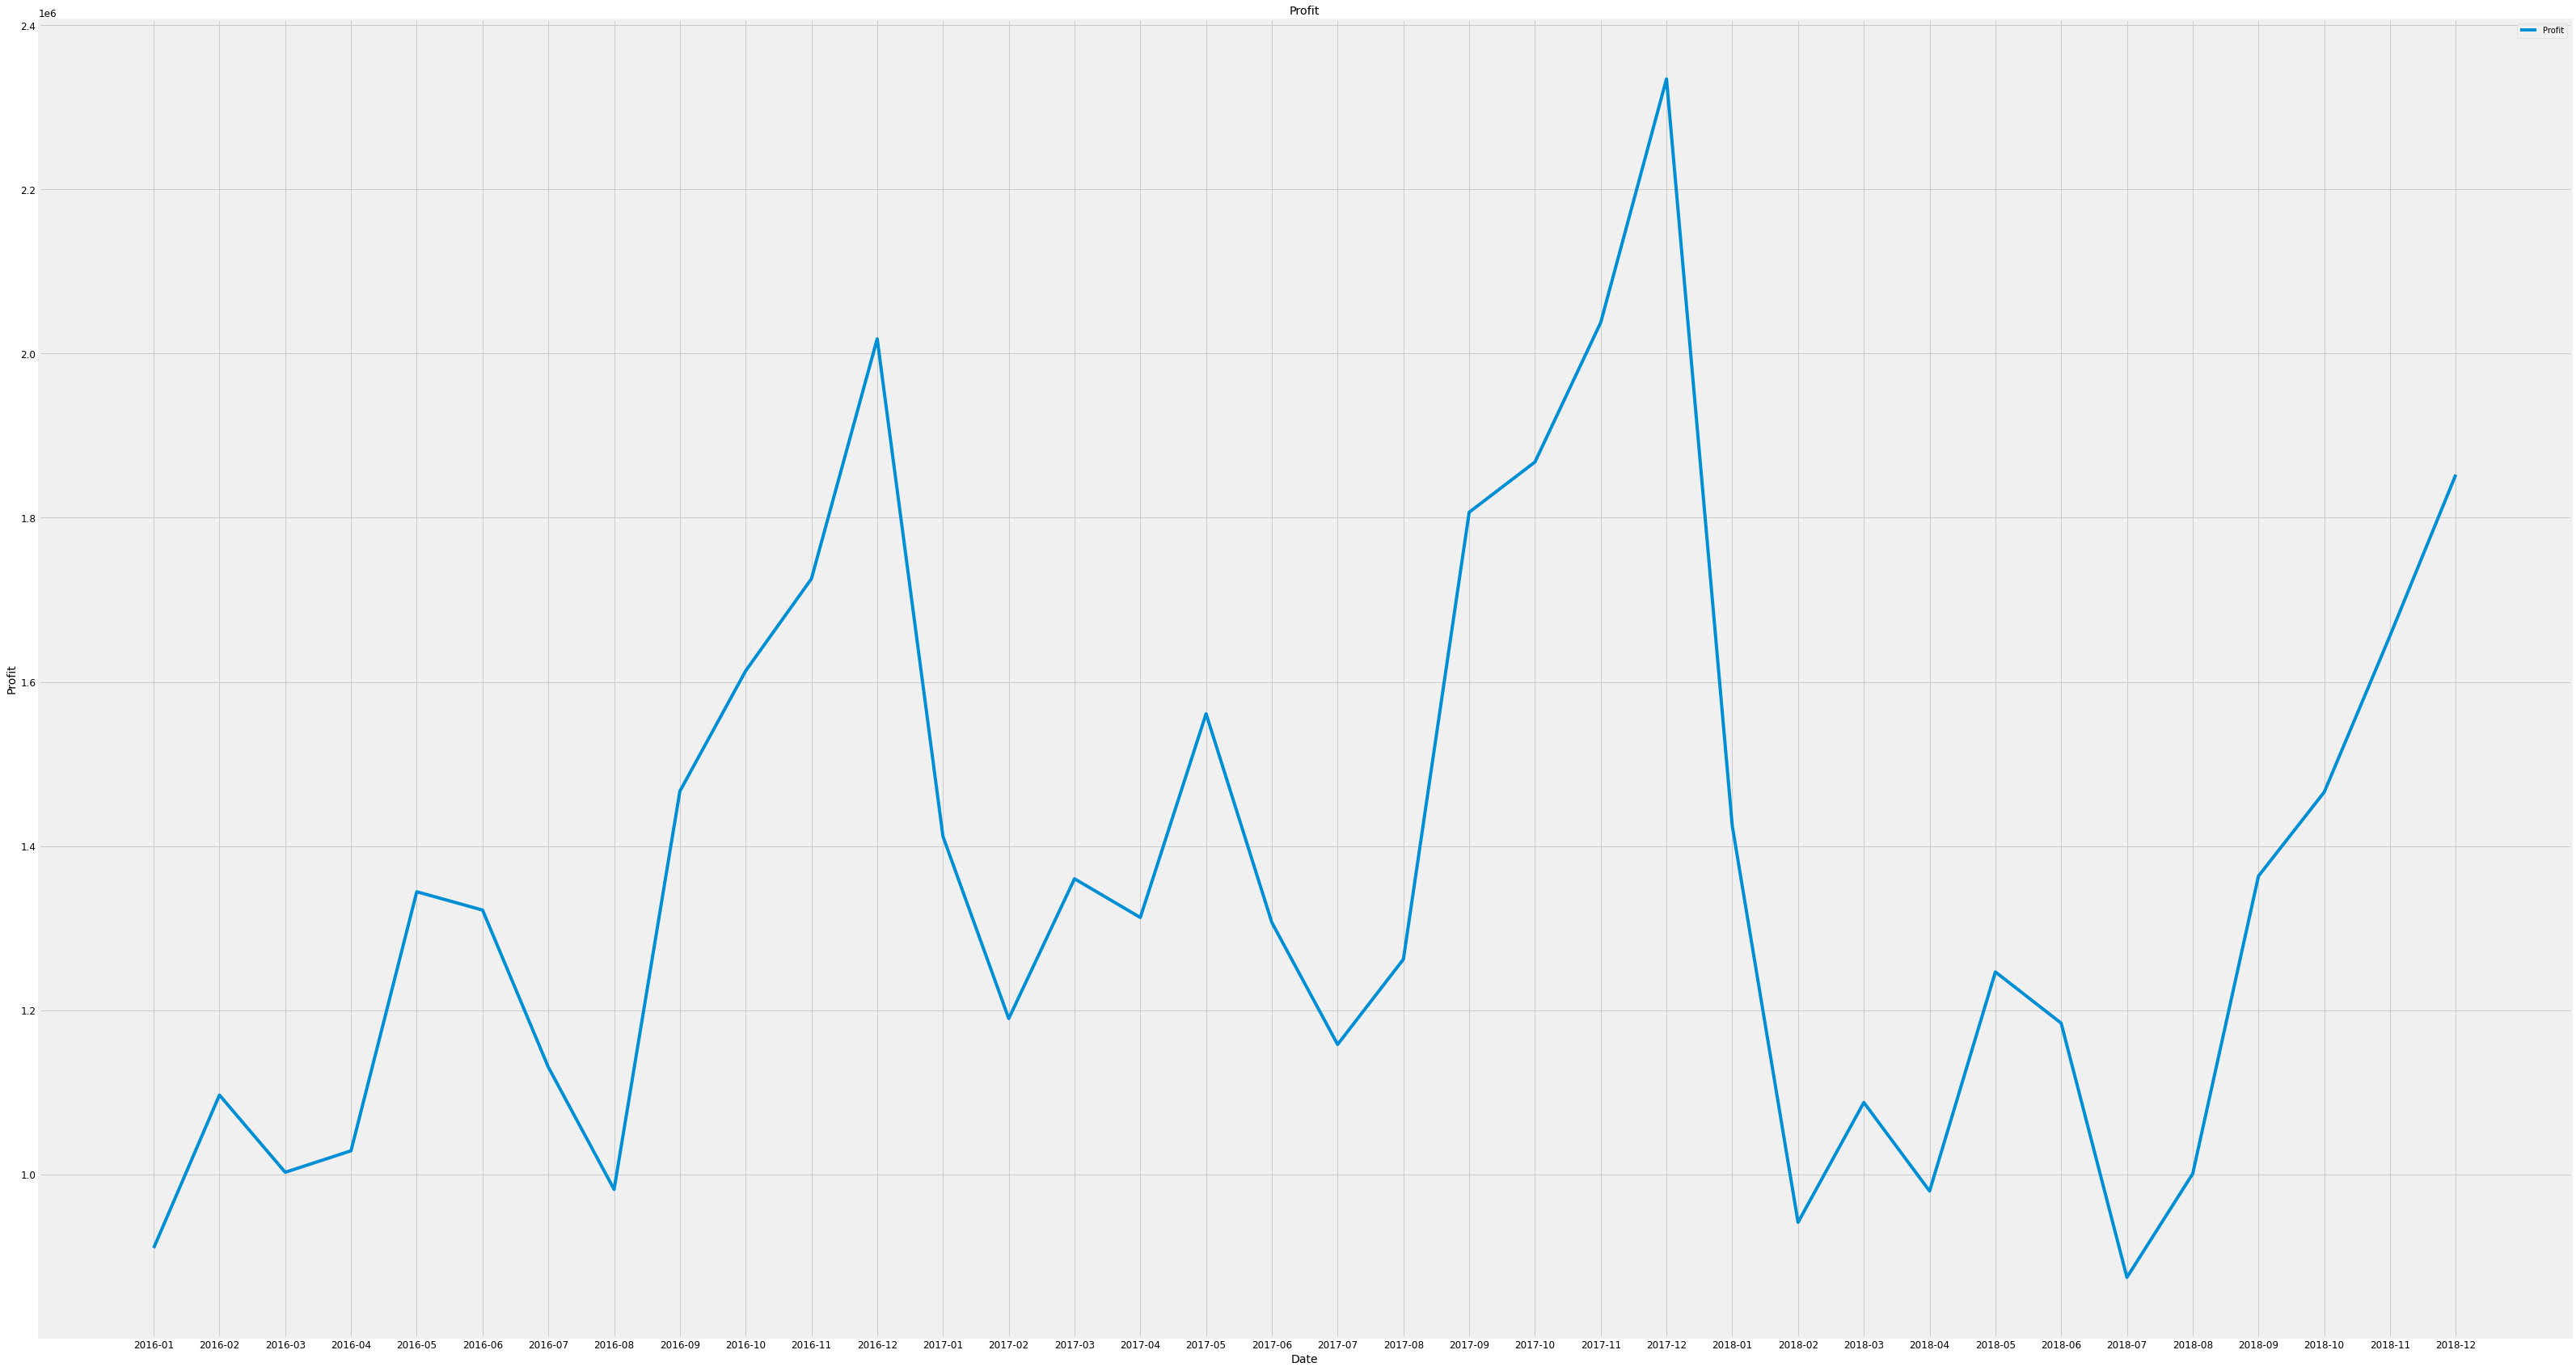

In [347]:
#Select the appropriate column for the time series analysis
time_series = master_df[['month_year','Profit']].copy()
#Sum the profit values according to month
tsa = time_series.groupby(time_series['month_year']).sum()

#set the plot size
plt.figure(figsize=(50, 30))
#plot the time series analysis
plt.plot(tsa.index.astype(str), tsa['Profit'], label = 'Profit')
#set the x label
plt.xlabel('Date')
#set the y-label
plt.ylabel('Profit')
#set the title
plt.title('Profit')
#set the legend
plt.legend()


The above plot is the time series plot of the profit for both companies as a whole and there is a possibility for seasonality. 

Lets check for the profit for each moth with the barplot by median.

In [351]:
#create a dataframe group by month and year
month_year_profit = master_df.groupby(['Month', 'Year'])
#unstack the values by median for the below mentioned three columns
(month_year_profit[['KM Travelled', 'Profit', 'Profit Percentage per Trip']].median()).unstack()

KM Travelled                   Profit                     \
Year          2016   2017    2018      2016      2017     2018   
Month                                                            
1            22.67  22.80  22.410  137.1640  118.3548  89.9930   
2            22.47  22.66  22.440  119.6894  120.2540  95.5272   
3            22.88  22.60  22.660   96.0816  107.5380  91.3052   
4            22.66  22.08  22.680  100.4499  100.2200  83.7760   
5            22.20  22.00  22.635  107.5020  113.2400  91.3808   
6            22.47  22.66  22.260  110.2012   90.0870  75.5724   
7            22.77  22.44  22.470   63.8036   66.3960  45.3004   
8            22.44  22.31  22.080   61.8460   64.8008  47.5080   
9            22.22  22.61  22.230   84.3736   84.6712  62.5000   
10           22.23  22.42  22.540   81.8660   84.6900  67.2238   
11           22.60  22.42  22.540   83.1200   80.6962  64.6400   
12           22.61  22.54  22.400   91.0760   88.4648  70.0004   

      Profit Percentage per Trip                  
Year                        2016    2017    2018  
Month                                             
1                         56.410  51.015  39.195  
2                         48.275  47.430  37.695  
3                         41.500  47.200  36.560  
4                         42.420  46.640  34.040  
5                         45.115  48.900  37.110  
6                         44.880  38.545  31.710  
7                         27.810  29.820  19.765  
8                         27.005  28.840  21.050  
9                         37.040  37.060  27.055  
10                        37.060  38.360  28.900  
11                        36.430  35.815  28.340  
12                        39.430  41.300  30.430

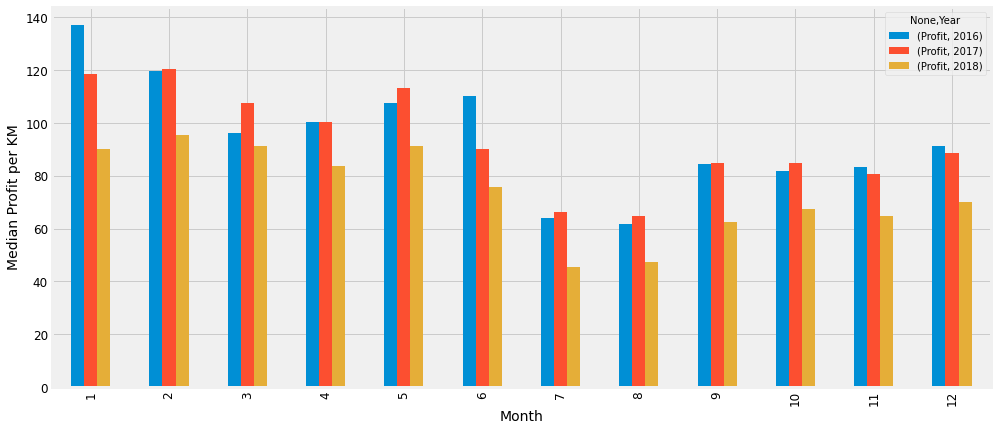

In [352]:
#plot the bar plot to see the profit margin
((month_year_profit[['Profit']].median()).unstack()).plot(kind='bar', figsize=(15,7), ylabel='Median Profit per KM');

From the plot, we can the profit margin is higher in 2016 and 2017 but 2018 is slightly going down.

### Inferential Statistics

T-test of comparing two means of different population to check for certain question raised from the above plots

In [372]:
#Import the required libraries

import scipy.stats as stat
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind


#define a function for t-test
def T_Test(a,b):
    '''Takes in the column with specific group or two column as a,b and gives us the t-test results
    Args: a: Column of specific group, b: Column of a specific group
    returns: None
    Prints: Results of Hypothesis test, t-vlaue, p-vlaue'''
    #Lets use the 20 percent as the sample data from the population
    sample_size = int((20/100)*359392)
    #convert it into a numpy series with a sample size
    sample_a = np.random.choice(a, sample_size)
    sample_b = np.random.choice(b, sample_size)
    #take the series into the t-test with equal variance False as vairance may differ
    stat, p_value = ttest_ind(sample_a, sample_b, equal_var = False)
    #print p-value and t-vlaue
    print(f'p-value: {p_value}')
    print(f't-vlaue:{stat}')
    # if p-value is less than 0.05, then we have 95% confidence to reject null hypothesis
    if p_value < 0.05:    
        print("We reject null hypothesis (H0) and assert the alternative hypothesis with 95% confidence")
    else:
        #print p-vlaue is more than 0.05, then we don't have 95% confidence
        print("We Fail to reject Null Hypothesis as there is no enough evidence to reject it.")

### Hypothesis test 

#### Test to compare the profit of the two cab companies

#### H0: Profit of yellow cab == Profit of Pink Cab
#### Ha: Profit of yellow cab != Profit of Pink Cab

In [373]:
#We will obtain a mean profit values of both companies

master_df['Profit'].groupby(master_df['Company']).mean()

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64

In [374]:
#Compute the t-test

T_Test(master_df[master_df['Company'] == 'Yellow Cab']['Profit'], master_df[master_df['Company'] == 'Pink Cab']['Profit'])

p-value: 0.0
t-vlaue:140.0637268079423
We reject null hypothesis (H0) and assert the alternative hypothesis with 95% confidence


From the above test, there is enough evidence to reject the null hypothesis and say profit earned by both cabs are not same.

### Test to compare the distance travelled by men and women

#### H0: Distance travelled by men == Distance travelled by Women

#### Ha: Distance travelled by men != Distance travelled by Women

In [362]:
#We will obtain a mean Km travelled values of both Gender

master_df['KM Travelled'].groupby(master_df['Gender']).mean()

Gender
Female    22.586388
Male      22.552992
Name: KM Travelled, dtype: float64

In [365]:
#Distance travelled by male and female are same

T_Test(master_df[master_df['Gender'] == 'Male']['KM Travelled'], master_df[master_df['Gender'] == 'Female']['KM Travelled'])

p-value: 0.13842389900721502
t-vlaue:-1.4816941021208172
We Fail to reject Null Hypothesis as there is no enough evidence to reject it.


From the above test, we have no enough evidence to say that men and women are travelling different distances. In other words, we can say men and women are travelling across the country irrespective of the gender.

### Test to compare the distance travelled by both the companies

#### H0: Distance travelled by yellow cab == Distance travelled by pink cab
#### Ha: Distance travelled by yellow cab != Distance travelled by pink cab

In [397]:
#We will obtain a mean Km travelled values of both companies

master_df['KM Travelled'].groupby(master_df['Company']).mean()

Company
Pink Cab      22.559917
Yellow Cab    22.569517
Name: KM Travelled, dtype: float64

In [367]:
#Distance travelled by companies

T_Test(master_df[master_df['Company'] == 'Yellow Cab']['KM Travelled'], master_df[master_df['Company'] == 'Pink Cab']['KM Travelled'])

p-value: 0.26294571077171447
t-vlaue:-1.1194602486051342
We Fail to reject Null Hypothesis as there is no enough evidence to reject it.


From the above t-test, it is clear that, distance travelled by the cab companies are not different.

### Test to compare the profit percentage per trip of each companies

#### H0: Profit percentage of Cabs per day is not same
#### Ha: Profit percentage of Cabs per day are same 

In [368]:
#We will obtain a mean profit percentage per trip values of both companies

master_df['Profit Percentage per Trip'].groupby(master_df['Company']).mean()

Company
Pink Cab      25.559567
Yellow Cab    54.296631
Name: Profit Percentage per Trip, dtype: float64

In [369]:
#Profit percentage by the companies

T_Test(master_df[master_df['Company'] == 'Yellow Cab']['Profit Percentage per Trip'], master_df[master_df['Company'] == 'Pink Cab']['Profit Percentage per Trip'])

p-value: 0.0
t-vlaue:150.6396869022799
We reject null hypothesis (H0) and assert the alternative hypothesis with 95% confidence


From the above t-test, It is evident the profit percentage per trip is not same

### Test to compare profit by gender

#### H0: Profit by Male Gender == Profit by Female Gender
#### Ha: Profit by Male Gender != Profit by Female Gender

In [370]:
#We will obtain a mean profit values of both Gender

master_df['Profit'].groupby(master_df['Gender']).mean()

Gender
Female    133.319979
Male      140.184890
Name: Profit, dtype: float64

In [371]:
#test for profit by gender

T_Test(master_df[master_df['Gender'] == 'Male']['Profit'], master_df[master_df['Gender'] == 'Female']['Profit'])

p-value: 2.2680967571965086e-14
t-vlaue:7.635225264043422
We reject null hypothesis (H0) and assert the alternative hypothesis with 95% confidence


From the above t-test it is clear that we have enough evidence to reject null hypothesis. Though Male and Female travel the same distance, there are more number of male using the cab service. Therefore the profit earned by genders is not same.

### Test to compare price charged per KM by the cab companies

####  H0: Price charged per KM, Yellow cab == Pink cab
####  Ha: Price charged per KM, Yellow cab != Pink cab

In [376]:
#We will obtain a mean price charged per KM values of both companies

master_df['Price Charged per KM'].groupby(master_df['Company']).mean()

Company
Pink Cab      13.768510
Yellow Cab    20.306073
Name: Price Charged per KM, dtype: float64

In [378]:
#t-test for Price charged per KM

T_Test(master_df[master_df['Company'] == 'Yellow Cab']['Price Charged per KM'], master_df[master_df['Company'] == 'Pink Cab']['Price Charged per KM'])

p-value: 0.0
t-vlaue:277.88136081903485
We reject null hypothesis (H0) and assert the alternative hypothesis with 95% confidence


From the above t-test, it is clear that the price charged per KM is not same for both cab companies.

### Chi-square Goodness of Fit test

**The Pearson’s Chi-Square statistical hypothesis is a test for independence between categorical variables**

In [388]:
#def a chi-square function
def goodness_of_fit(crosstab_table, confidence_interval):
    '''Takes in the crosstab table and confidence interval, puts in the scipy library chi_square module
    and gives the results
    Args: Crosstab_table: table to be considered for test, Confidence interval: alpha value
    returns: None
    Prints: Chi-stat value, p-value, Degree of freedom'''
    #def the variables that we need from the chi_square module from the scipy library
    statistic, p, dof, expected = stat.chi2_contingency(crosstab_table)
    #print the values
    print(f'Chi2 statistic value = {statistic}')
    print(f'p - value = {p}')
    print("Degree of Freedom: ", dof)
    #set the alpha value
    alpha = 1.0 - confidence_interval
    percent = confidence_interval*100
    #if p-vlaue is less than alpha value, then reject null hypothesis
    if p <= alpha:
        print(f"We reject null hypothesis (H0) and assert the alternative hypothesis with {percent}% confidence")
    else:
        #if p-value more than alpha value, then don't reject the null hypothesis
        print("We Fail to reject Null Hypothesis as there is no enough evidence to reject it.")

### Test of payment mode preference by Gender

#### H0: There is no preference in payment mode by Gender
#### Ha: There is preference in paymode by Gender

In [384]:
# Create a contigency table
gender_company_ct = pd.crosstab(master_df['Gender'], master_df['Payment_Mode'])
gender_company_ct

Payment_Mode,Card,Cash
Gender,,
Female,92025,61455
Male,123479,82433


In [385]:
#Payment mode preference test by gender

goodness_of_fit(gender_company_ct, 0.95)

Chi2 statistic value = 0.001983167274601292
p - value = 0.9644797341429527
Degree of Freedom:  1
We Fail to reject Null Hypothesis as there is no enough evidence to reject it.


There is no enough evidence to say that there is a preference towards the mode of payment by genders.

### Test of Preference of cab by gender

#### H0: There is no cab preference by gender
#### Ha: There is cab preference by gender

In [386]:
# Create a contigency table
gender_company_ct = pd.crosstab(master_df['Gender'], master_df['Company'])
gender_company_ct

Company,Pink Cab,Yellow Cab
Gender,,
Female,37480,116000
Male,47231,158681


In [389]:
#Payment mode preference test by gender

goodness_of_fit(gender_company_ct, 0.95)

Chi2 statistic value = 107.22063897254299
p - value = 3.982674650131372e-25
Degree of Freedom:  1
We reject null hypothesis (H0) and assert the alternative hypothesis with 95.0% confidence


From the above goodness of fit test, we can say there is preference towards the cab by gender.

### Test of Relationship between the city and the cab company

#### H0: There is no relationship between city and cab company
#### Ha: There is relationship between city and cab company

In [390]:
# Contingency Table
city_company_ct = pd.crosstab(master_df['City'], master_df['Company'])
city_company_ct

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


In [391]:
goodness_of_fit(city_company_ct, 0.95)

Chi2 statistic value = 39825.16829453775
p - value = 0.0
Degree of Freedom:  18
We reject null hypothesis (H0) and assert the alternative hypothesis with 95.0% confidence


From the above test, there is enough evidence to say there is relatioship between cities and the cab companies.

### Test of relationship between payment mode and cab companies

#### H0: There is no relationship between payment mode and cab companies
#### Ha: There is relationship betweeb payment mode and cab companies

In [392]:
# Contingency Table
payment_company_ct = pd.crosstab(master_df['Payment_Mode'], master_df['Company'])
payment_company_ct

Company,Pink Cab,Yellow Cab
Payment_Mode,,
Card,50719,164785
Cash,33992,109896


In [394]:
goodness_of_fit(payment_company_ct, 0.95)

Chi2 statistic value = 0.3733235887859897
p - value = 0.5411981778304723
Degree of Freedom:  1
We Fail to reject Null Hypothesis as there is no enough evidence to reject it.


From the above test, we can say there is no relationship bewteen the payment mode and cab companies.

## Final Inference from EDA

The four individual datasets in csv files are joined using key columns
Some new columns are introduced to generate useful insights
There are no duplicated rows
There are no missing values

From the **corr plot** Km travelled and the cost of trip in highly correlated and there are some fields such between price charged and km travelled, price charged and cost of trip. As in terms with profit, Km travelled, price charged, cost of trip, population, users are higly correlated.

The **top 5 cities** that are yeilding high profit are,
    **New York, Los Angelles, Washington DC, Chicago, Boston**
    
**2017** is the highest profit yielding year as a whole.

The **age group 20-40** are using the cab service large in number.

The people who are getting **salary upto 25000 USD/Month** are using the cab large in number.

In both companies, **card transaction** were the **highes**t in number happened. The **goodness of fit test** has been carried out to check the relatioship between the payment mode and company, the results were found to be as **no relationship or preference** by the companies towrds the mode of payment. Also, the high profit yielded by cash transaction. 

The **overall profit** of the cab companies are,
Company
**Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07**

From the count plot, we aimed to see the **payment mode by gender**. It's **hard to say the preference but card transaction holds high in number** in both gender. The **goodness of fit test** has been carried out to check the relatioship between the payment mode and Gender, and **there is no enough evidence** to say that there is a preference towards the mode of payment by gender.

Also we aimed to see the **cab company preference by gender** through count plot and from the plot, both male and female genders used the **yellow cab** more times. The **goodness of fit test** has been carried out to check the relationship between the Companies and Gender and from the goodness of fit test,**there is preference** towards the cab by gender.

The barplot of **profit by gender** yielded nearly same amount of profit. But male population stayed above the list. The values are
Gender
**Female    2.046195e+07
Male      2.886575e+07.**
The **t-test** has been carried out to compare mean means of both population. And from the t-test it is clear that we have enough evidence to reject null hypothesis. Though Male and Female travel the same distance, there are more number of male using the cab service. Therefore the profit earned by genders is not same. **There is a difference in means of two population.**

**The yearly profit of both the companies were compared. The values found to be
Year                2016          2017          2018           All
Company                                                           
Pink Cab    1.713511e+06  2.033655e+06  1.560162e+06  5.307328e+06
Yellow Cab  1.392700e+07  1.657598e+07  1.351740e+07  4.402037e+07
All         1.564051e+07  1.860963e+07  1.507756e+07  4.932770e+07**

The scatter plot showed that there is **strong positive relationship** between the KM travelled and cost of the trip, Price charged, profit.

The **averge profit per KM** for each companies are
Company
 **Pink Cab      13.768510 USD
 Yellow Cab    20.306073 USD**
 
The **average profit percentage per trip** by company are
Company
 **Pink Cab      25.559567%
 Yellow Cab    54.296631%**

We noticed the **gap** between the **cumulative sum of price charged and the cost of trip** were increasing as the years went by.

The **time series analysis** shows there is **seasonality and trend** in the graph. The **further forecating analysis** would help us in predicting the profit in coming years.

We saw a **profit margin higher in first few months and last few months and dull in middle of the years. Altogether the profit went down in 2018**.

For the **Hypothesis testing**, the investigated areas are.

Is there a difference in the **profit for yellow and pink cab**?
**Yes**, there is difference in profit earned by cab comapnies with 95% confidence interval.
    
Is there a difference in **distance travelled by gender**?
**No**, there is no significant difference in distance travelled by gender since we don't have enough evidence to prove.
    
Is there a difference in **distance travelled by Cab companies**?  
 **No**, there is no significant difference in distance travelled by Cab companies since we don't have enough evidence to prove.
    
Is there a difference in **profit percentage per trip by cab companies**?
**Yes**, there is significant difference in profit percentage per trip by the cab companies with 95% confidence interval.
    
Is there a difference in **profit made by gender**?
**Yes**, there is significant difference in profit made between the gender with 95% confidence.
    
Is there a difference in **price charged per KM made by Cab companies**?
**Yes**, there is significant difference in price charged per KM between Cab companies.
    
Is there a **preference in paymode by gender**?
**No**, there is no enough evidence to say that there is a preference towards the mode of payment by genders.
    
Is there a preference in **Cab company by gender**?
**Yes**, there is significant relationship in Cab company prefernce by gender.
    
Is there a **relationship between the Cab company and city**?
**Yes**, there is relatioship between the cab company and city.
    
Is there a relationship between **payment mode and cab company**?
**Yes**, there is relationship between the payment mode and the cab company.
    